In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [4]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_theme(style="whitegrid")

In [5]:
df1 = pd.read_csv("world-happiness-report-2021.csv")

In [6]:
df1 = df1[['Country name','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy'
     ,'Freedom to make life choices','Generosity','Perceptions of corruption','upperwhisker','lowerwhisker']]

In [7]:
#we need to sort the dataset to find out the top 50 happiest countries by ladder score

df1.sort_values('Ladder score',ascending=False,inplace = True)
df1.reset_index(drop=True,inplace = True)
df1.drop(['upperwhisker','lowerwhisker'],axis = 1, inplace = True)
df1.drop(['Social support'],axis = 1,inplace = True)

In [9]:
df1.columns

Index(['Country name', 'Ladder score', 'Logged GDP per capita',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

## The most Happy Countrie in 2021

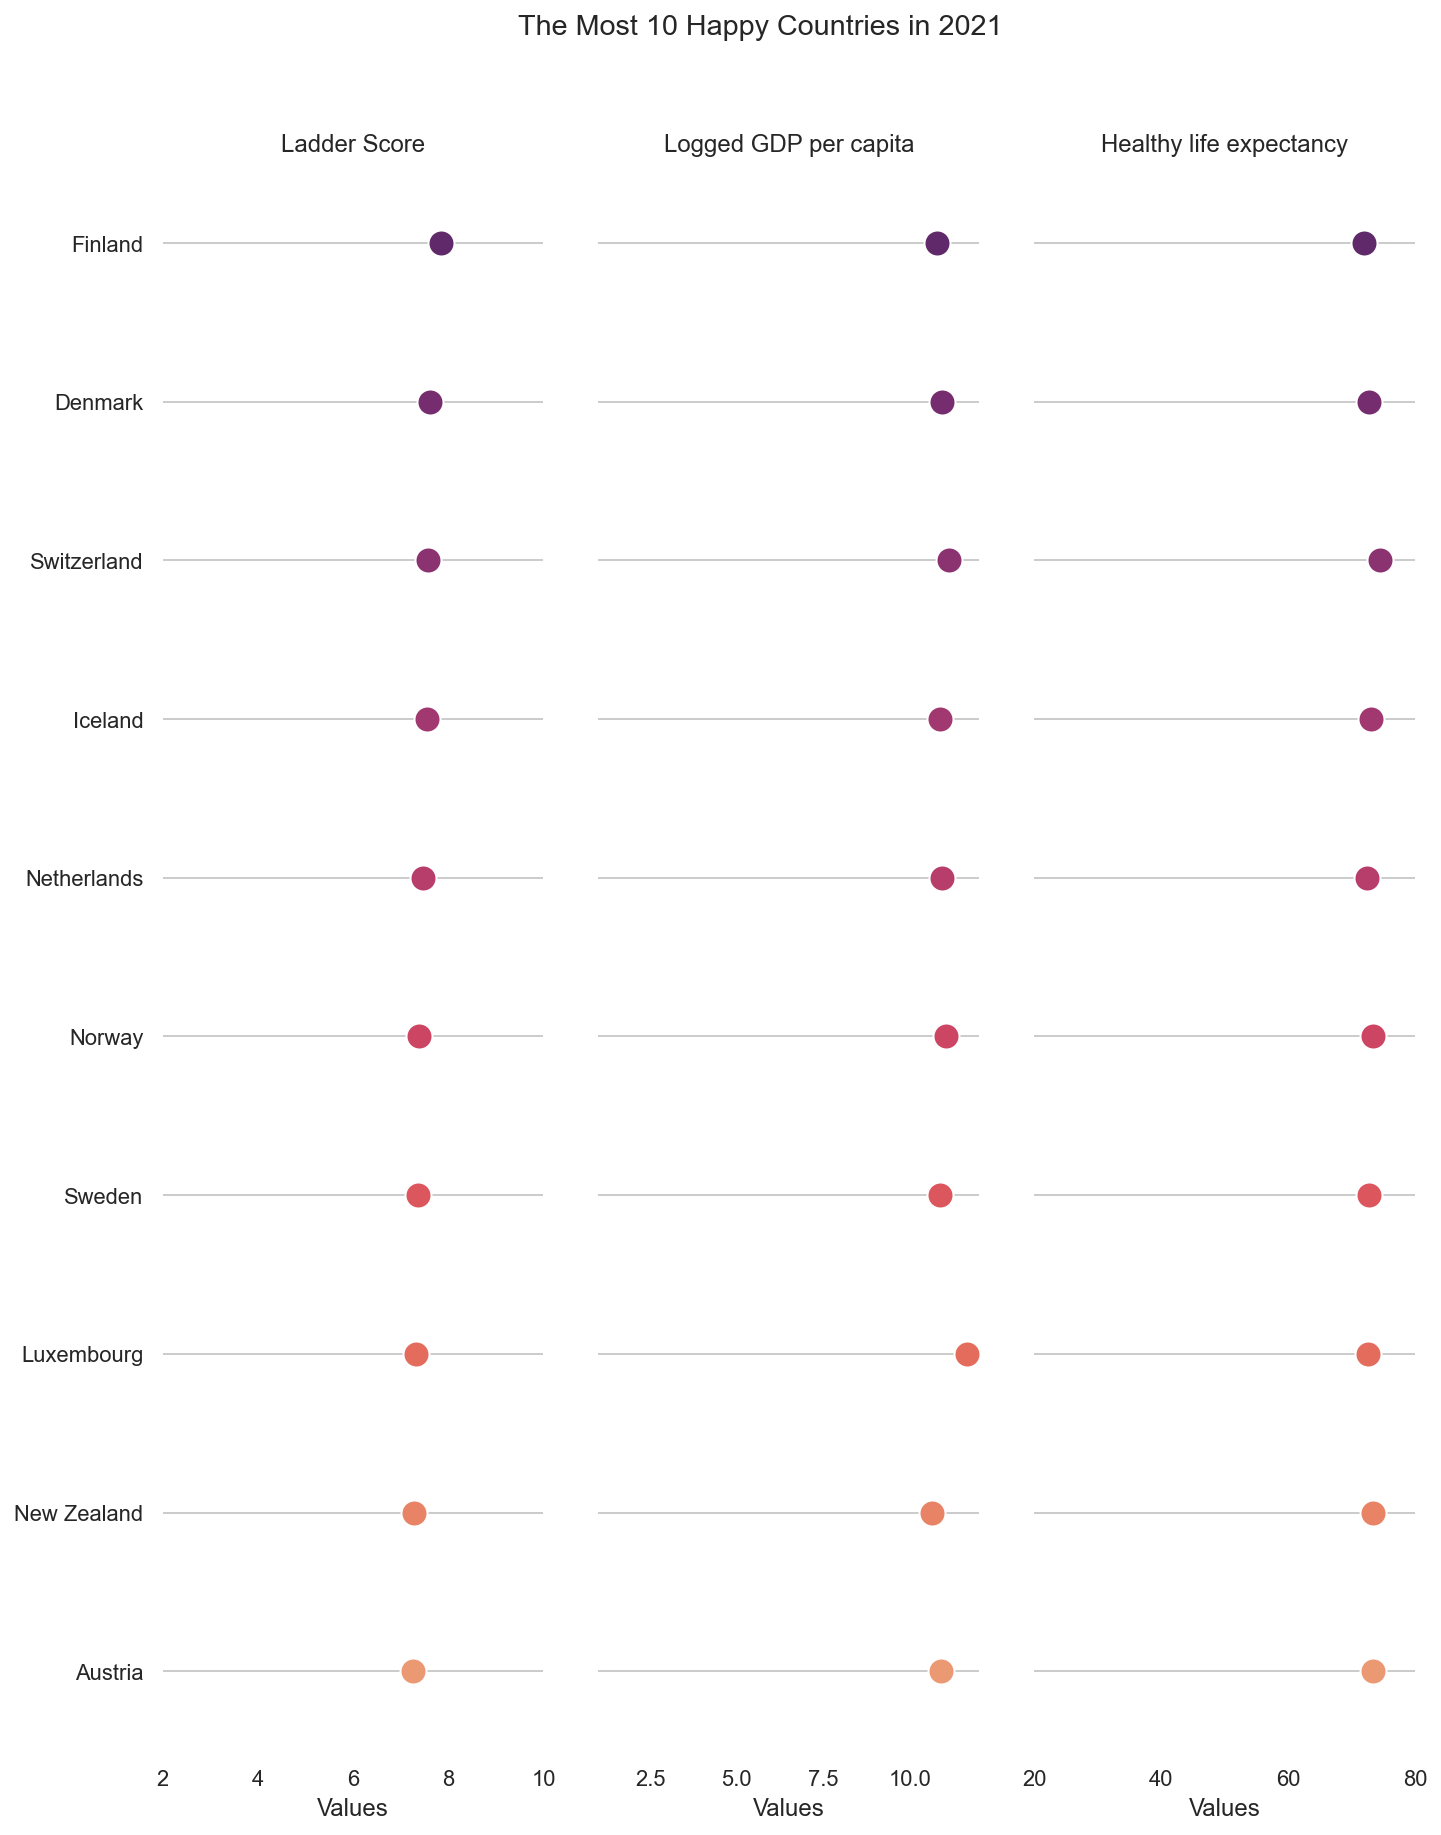

In [10]:
#Data for year 2020
df1.sort_values('Ladder score',ascending=False ,inplace = True)
df1.reset_index(drop=True,inplace = True)
df_t = df1[:10]
df_t= df_t.drop(['Country name'],axis = 1)
#Normalizing values between 0 and 1 to make everything 
min_max_scaler = preprocessing.MinMaxScaler()
df_plot = pd.DataFrame(min_max_scaler.fit_transform(df_t), columns=df_t.columns)
df_plot['Country name'] = list(df1['Country name'][:10])
# Make the PairGrid
g = sns.PairGrid(df1[:10],
                 x_vars=df_plot.columns[:-4], y_vars=["Country name"],
                 height=13, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=13, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0,None), xlabel="Values", ylabel="")

g.axes[0,0].set_xlim(2,10)
g.axes[0,1].set_xlim(1,12)
# g.axes[0,2].set_xlim(0.6,1.2)
g.axes[0,2].set_xlim(20,80)
# g.axes[0,4].set_xlim(0,1.2)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('The Most 10 Happy Countries in 2021')
# Use semantically meaningful titles for the columns
titles = ["Ladder Score", "Logged GDP per capita","Healthy life expectancy"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(right = True,left=True, bottom=True)
plt.savefig("Happy_2021.png",bbox_inches = 'tight')

#### Top 10 Unhappiest Countries (Year 2021)

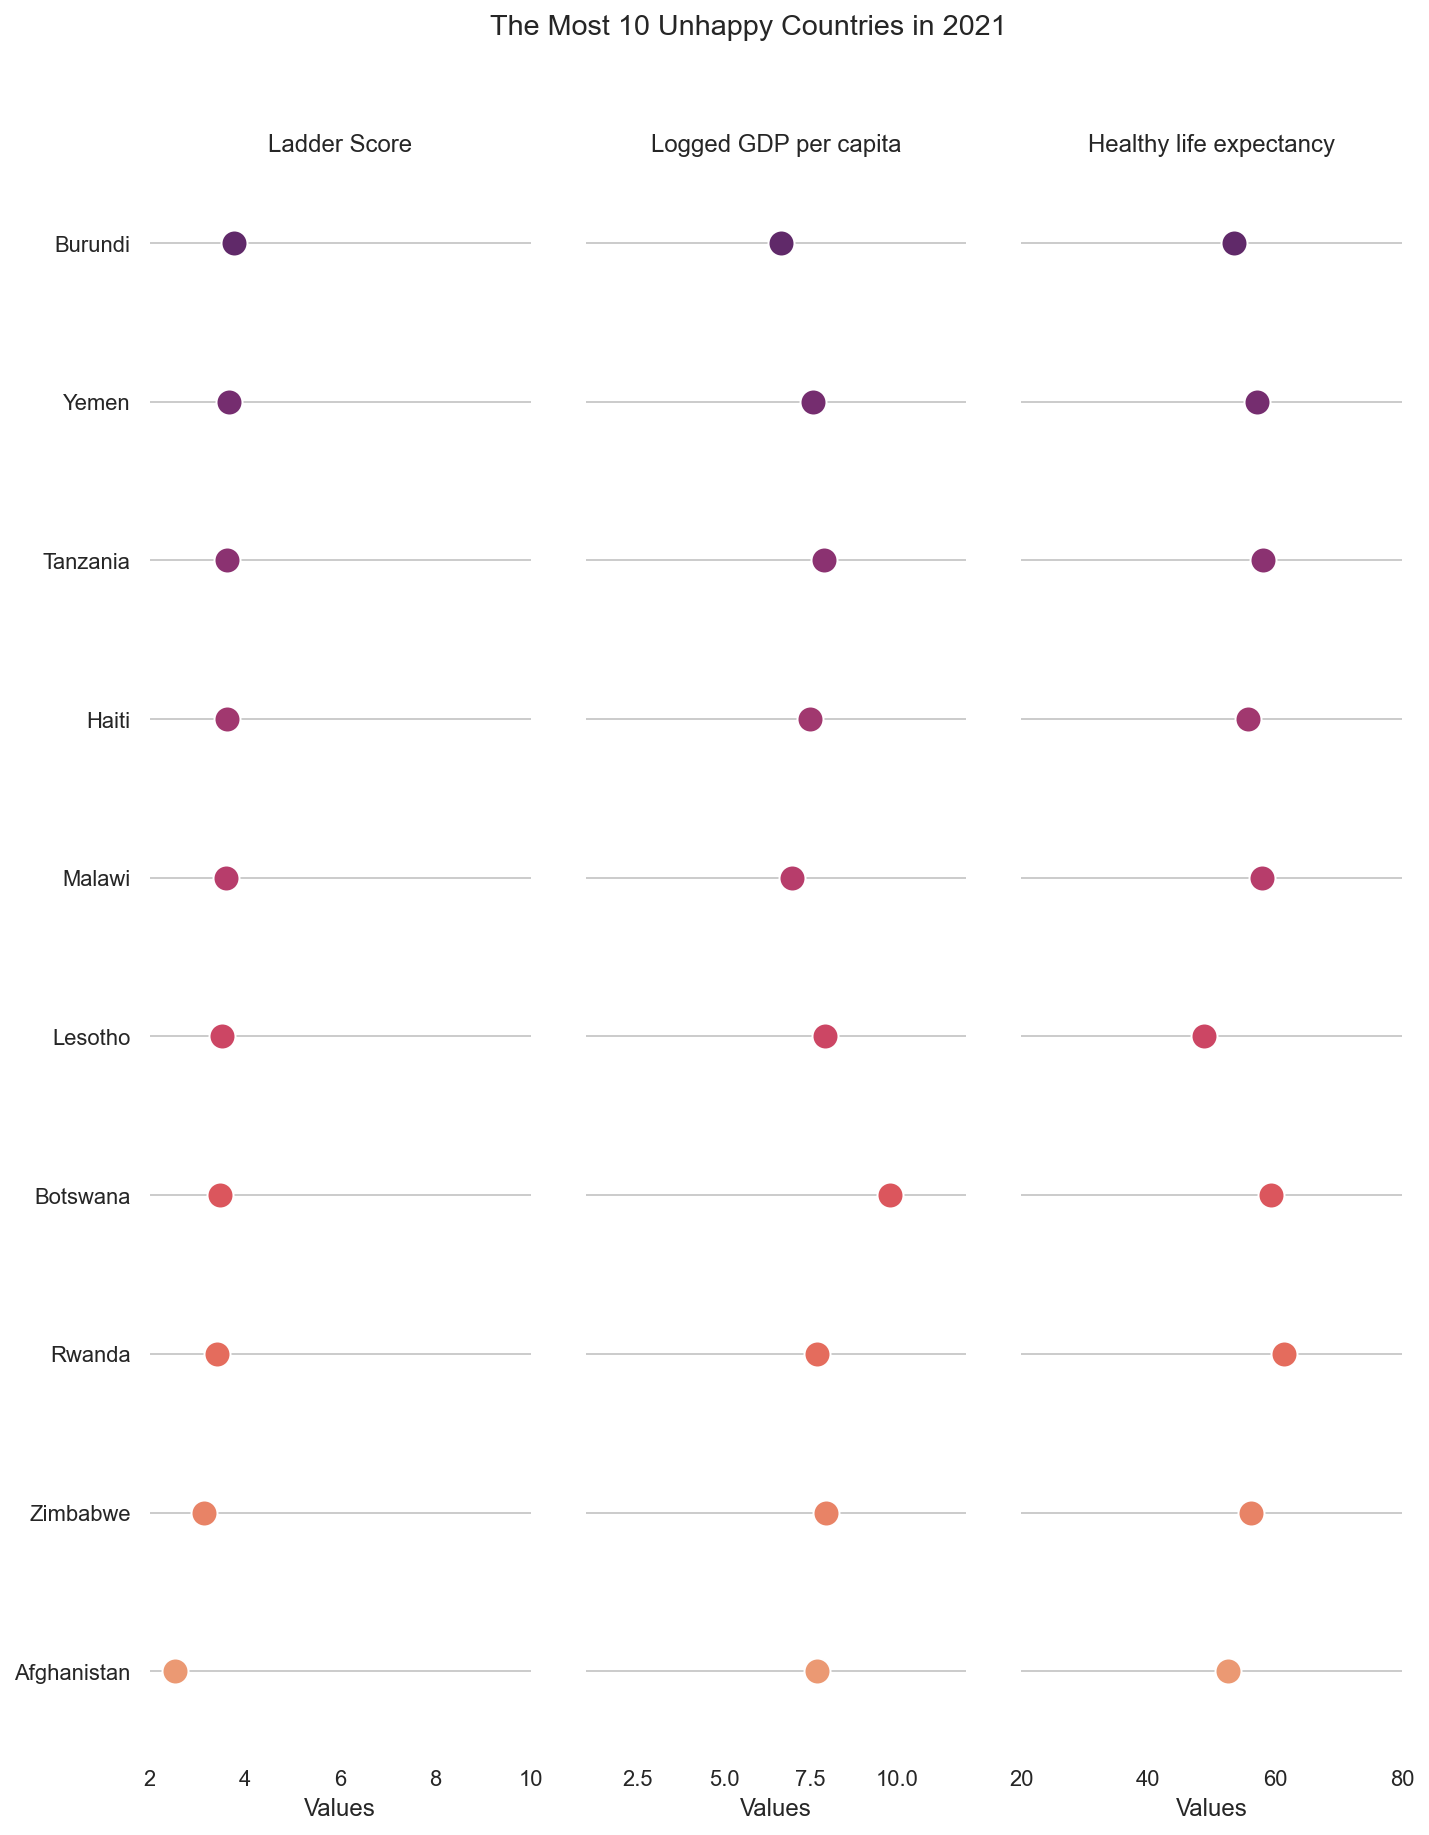

In [11]:
#Data for year 2021
df1.sort_values('Ladder score',ascending=False ,inplace = True)
df1.reset_index(drop=True,inplace = True)
df_t = df1[-10:]
df_t= df_t.drop(['Country name'],axis = 1)
#Normalizing values between 0 and 1 to make everything 
min_max_scaler = preprocessing.MinMaxScaler()
df_plot = pd.DataFrame(min_max_scaler.fit_transform(df_t), columns=df_t.columns)
df_plot['Country name'] = list(df1['Country name'][-10:])
# Make the PairGrid
g = sns.PairGrid(df1[-10:],
                 x_vars=df_plot.columns[:-4], y_vars=["Country name"],
                 height=13, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=13, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0,None), xlabel="Values", ylabel="")

g.axes[0,0].set_xlim(2,10)
g.axes[0,1].set_xlim(1,12)
# g.axes[0,2].set_xlim(0.6,1.2)
g.axes[0,2].set_xlim(20,80)
# g.axes[0,4].set_xlim(0,1.2)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('The Most 10 Unhappy Countries in 2021')
# Use semantically meaningful titles for the columns
titles = ["Ladder Score", "Logged GDP per capita",
          "Healthy life expectancy"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(right = True,left=True, bottom=True)
plt.savefig("UnHappy_2021.png",bbox_inches = 'tight')

# The End